In [2]:
import pandas as pd
import numpy as np
import datetime

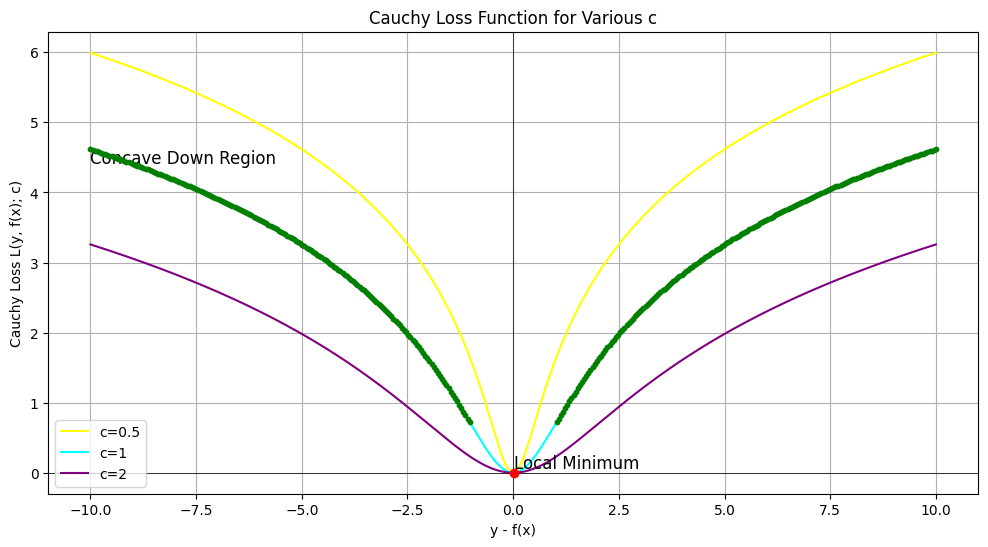

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Cauchy loss function
def cauchy_loss(y_f, c=1):
    return np.log1p((y_f / c)**2)

# Define a range for y-f(x)
y_f = np.linspace(-10, 10, 400)

# Calculate the Cauchy loss for different scale parameters c
loss_05 = cauchy_loss(y_f, c=0.5)
loss_1 = cauchy_loss(y_f, c=1)
loss_2 = cauchy_loss(y_f, c=2)

# Plot the Cauchy loss for different values of c
plt.figure(figsize=(12, 6))
plt.plot(y_f, loss_05, label='c=0.5', color='yellow')
plt.plot(y_f, loss_1, label='c=1', color='cyan')
plt.plot(y_f, loss_2, label='c=2', color='purple')

# Mark the minimum point
min_index = np.argmin(loss_1)
plt.scatter(y_f[min_index], loss_1[min_index], color='red', zorder=5)
plt.text(y_f[min_index], loss_1[min_index], 'Local Minimum', fontsize=12, verticalalignment='bottom')

# Annotate the convexity property by showing the second derivative test
second_derivative = np.gradient(np.gradient(loss_1))
concave_down_points = y_f[second_derivative < 0]
plt.scatter(concave_down_points, cauchy_loss(concave_down_points, c=1), color='green', zorder=5, s=10)
plt.text(concave_down_points[0], cauchy_loss(concave_down_points, c=1)[0], 'Concave Down Region', fontsize=12, verticalalignment='top')

# Label the axes and show the legend
plt.xlabel('y - f(x)')
plt.ylabel('Cauchy Loss L(y, f(x); c)')
plt.title('Cauchy Loss Function for Various c')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


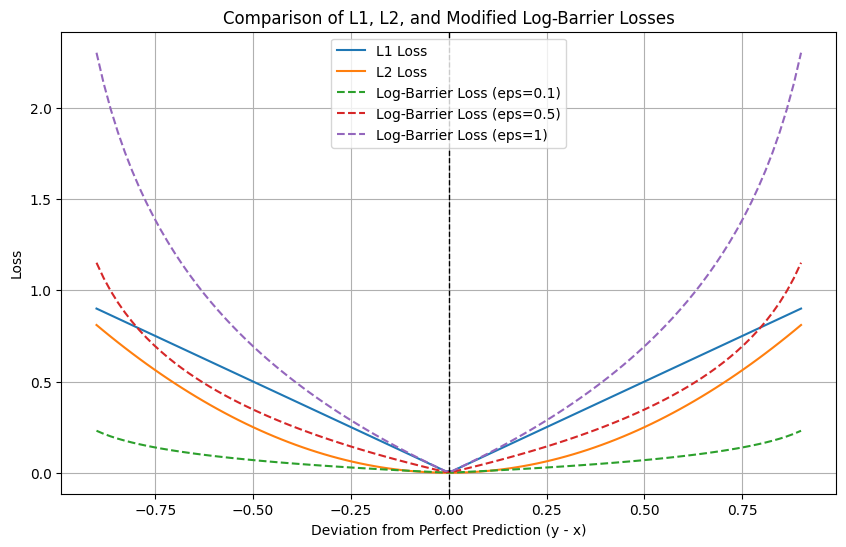

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the losses
def L1_loss(deviation):
    return np.abs(deviation)

def L2_loss(deviation):
    return deviation ** 2

def log_barrier_loss(deviation, eps, boundary=1):
    # For the log barrier, we assume a boundary at 1 and consider the deviation from this boundary
    # We're modifying the typical log barrier to make it applicable to this visualization
    return -eps * np.log(boundary - np.abs(deviation))

# Sample data for deviation from the perfect prediction y = x
deviations = np.linspace(-0.9, 0.9, 100) # Avoid -1 and 1 to prevent -inf in log barrier
epsilons = [0.1, 0.5, 1]

# Calculate losses
l1_losses = L1_loss(deviations)
l2_losses = L2_loss(deviations)
log_barrier_losses = {eps: log_barrier_loss(deviations, eps) for eps in epsilons}

# Plot the losses
plt.figure(figsize=(10, 6))

# Plot L1 and L2 losses
plt.plot(deviations, l1_losses, label='L1 Loss')
plt.plot(deviations, l2_losses, label='L2 Loss')

# Plot log-barrier losses for different epsilons
for eps, losses in log_barrier_losses.items():
    plt.plot(deviations, losses, label=f'Log-Barrier Loss (eps={eps})', linestyle = '--')

# Highlight the zero-deviation line
plt.axvline(0, color='black', linewidth=1, linestyle='--')

# Label the axes and add a legend
plt.xlabel('Deviation from Perfect Prediction (y - x)')
plt.ylabel('Loss')
plt.title('Comparison of L1, L2, and Modified Log-Barrier Losses')
plt.legend()
plt.grid(True)
plt.show()


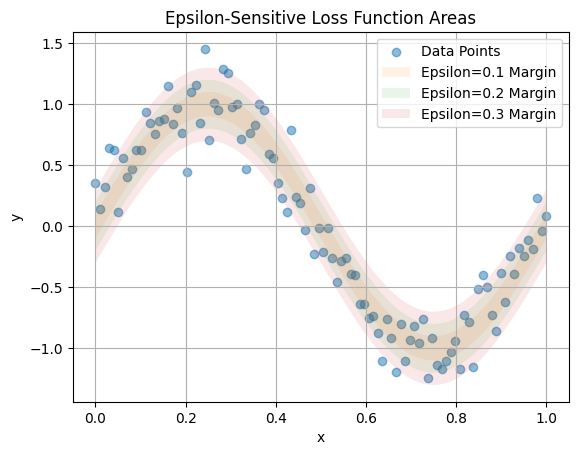

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(0) # For reproducibility
x = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * x) + np.random.normal(scale=0.2, size=100)

# Define the epsilon-sensitive loss function
def epsilon_sensitive_loss(y_true, y_pred, epsilon):
    return np.maximum(0, np.abs(y_true - y_pred) - epsilon)

# Predictions for the purpose of visualization (let's assume a perfect model for simplicity)
y_pred = np.sin(2 * np.pi * x)

# Epsilon values
epsilons = [0.1, 0.2, 0.3]

# Create the scatter plot
plt.scatter(x, y, alpha=0.5, label='Data Points')

# Plot epsilon margins and loss function areas
for epsilon in epsilons:
    upper_margin = y_pred + epsilon
    lower_margin = y_pred - epsilon
    plt.fill_between(x, lower_margin, upper_margin, alpha=0.1, label=f'Epsilon={epsilon} Margin')

# Label the axes and add a legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Epsilon-Sensitive Loss Function Areas')
plt.legend()
plt.grid(True)
plt.show()

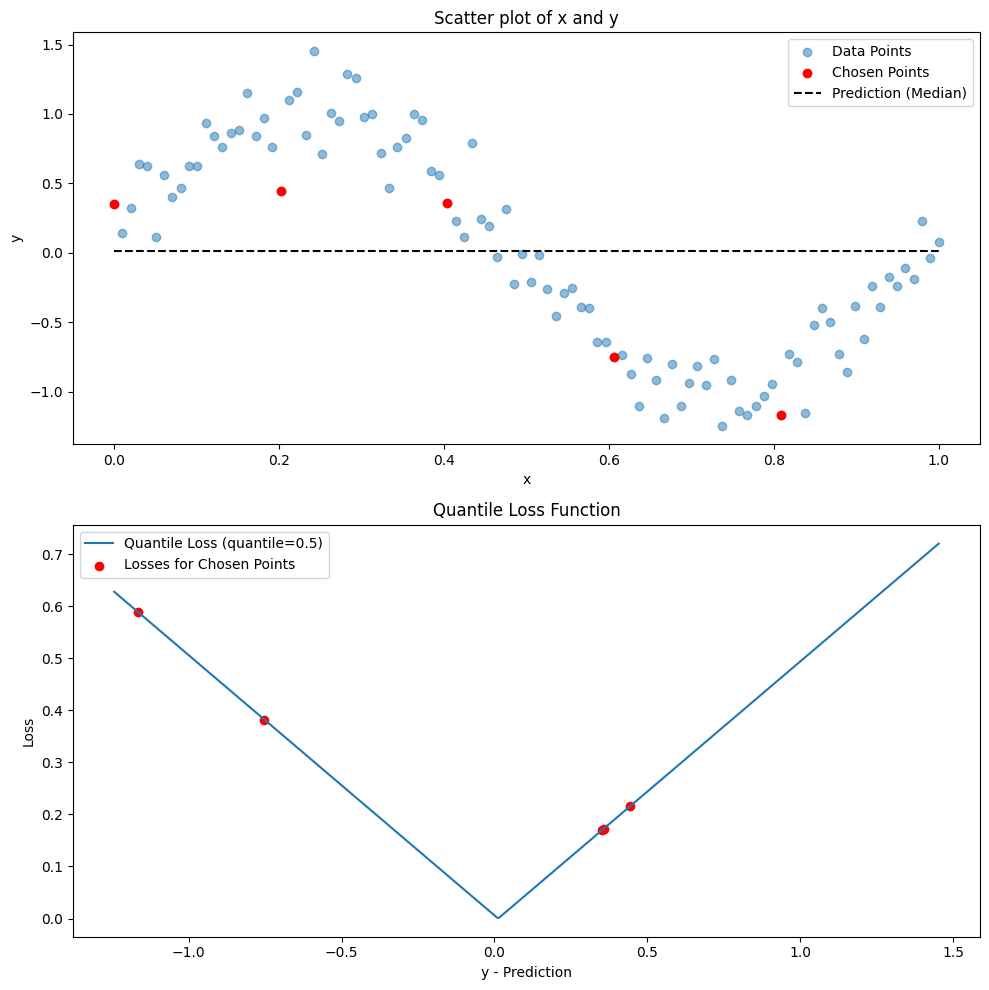

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate some random data for x and y
x = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * x) + np.random.normal(scale=0.2, size=100)

# Define the quantile loss function
def quantile_loss(y_true, y_pred, quantile):
    # Here, e = y_true - y_pred
    e = y_true - y_pred
    return np.maximum(quantile * e, (quantile - 1) * e)

# Choose a few x points and their corresponding y values
x_points = x[::20]  # Every 5th point
y_points = y[::20]  # Corresponding y values

# For the sake of the example, let's assume the predictions are the mean of y
y_pred = np.mean(y)

# Choose a quantile
quantile = 0.5  # 50th percentile, which is median

# Calculate the loss for the chosen points
losses = quantile_loss(y_points, y_pred, quantile)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Scatter plot of all data points
axs[0].scatter(x, y, alpha=0.5, label='Data Points')
axs[0].scatter(x_points, y_points, color='red', label='Chosen Points')
axs[0].plot(x, [y_pred] * len(x), color='black', linestyle='--', label='Prediction (Median)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Scatter plot of x and y')
axs[0].legend()

# Loss function plot
# For visualization, we use a range of y-values around the prediction to plot the loss function
y_range = np.linspace(y.min(), y.max(), 500)
loss_function_values = quantile_loss(y_range, y_pred, quantile)

axs[1].plot(y_range, loss_function_values, label=f'Quantile Loss (quantile={quantile})')
axs[1].scatter(y_points, losses, color='red', label='Losses for Chosen Points')
axs[1].set_xlabel('y - Prediction')
axs[1].set_ylabel('Loss')
axs[1].set_title('Quantile Loss Function')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [1]:
# 0-1 Loss optimal minimizer
import pandas as pd
from collections import Counter

# Given data
data = pd.DataFrame({'X': [1, 1, 2, 1, 3, 2, 2, 1], 'Y': ['a', 'a', 'b', 'c', 'c', 'b', 'a', 'b']})

# Calculate class probabilities for each x
class_probabilities = data.groupby(['X', 'Y']).size() / data.groupby('X').size()

# Find the most probable class for each x
optimal_predictor = class_probabilities.groupby('X').idxmax().apply(lambda x: x[1]).reset_index()

print(optimal_predictor)


   X  0
0  1  a
1  2  b
2  3  c


In [6]:
# 0-1 loss numerical example
import pandas as pd

# Given data
data = pd.DataFrame({'X': [1, 1, 2, 1, 3, 2, 2, 1], 'Y': ['a', 'a', 'b', 'c', 'c', 'b', 'a', 'b']})

# Calculate P(Y = k | x = x) for each unique x and each class k
class_probabilities = data.groupby(['X', 'Y']).size() / data.groupby('X').size()

# Display the class probabilities
print(class_probabilities.reset_index(name='P(Y=k | x=x)'))

class_probabilities = class_probabilities.reset_index(name='P(Y=k | x=x)')

   X  Y  P(Y=k | x=x)
0  1  a      0.500000
1  1  b      0.250000
2  1  c      0.250000
3  2  a      0.333333
4  2  b      0.666667
5  3  c      1.000000


In [7]:
class_probabilities


,X,Y,P(Y=k | x=x)
0,1,a,0.500000
1,1,b,0.250000
2,1,c,0.250000
3,2,a,0.333333
4,2,b,0.666667
5,3,c,1.000000


In [12]:
# False predictions for X values 1 and 3
false_predictions = [1, 3]

# Filter class probabilities for the false predictions
false_predictions_probabilities = class_probabilities[class_probabilities['X'].isin(false_predictions)]

# Sum of P(Y = k | x = x) for each class k
sum_probabilities = false_predictions_probabilities.groupby('Y')['P(Y=k | x=x)'].sum()

# Display the sum of probabilities for each class
print(sum_probabilities.reset_index(name='Sum of P(Y=k | x=x)'))

   Y  Sum of P(Y=k | x=x)
0  a                 0.50
1  b                 0.25
2  c                 1.25


In [10]:
# False predictions for X values 1 and 3
false_predictions = [2]

# Filter class probabilities for the false predictions
false_predictions_probabilities = class_probabilities[class_probabilities['X'].isin(false_predictions)]

# Sum of P(Y = k | x = x) for each class k
sum_probabilities = false_predictions_probabilities.groupby('Y')['P(Y=k | x=x)'].sum()

# Display the sum of probabilities for each class
print(sum_probabilities.reset_index(name='Sum of P(Y=k | x=x)'))

   Y  Sum of P(Y=k | x=x)
0  a             0.333333
1  b             0.666667


In [14]:
import pandas as pd

# Given data
data = pd.DataFrame({'X': [1, 1, 2, 1, 3, 2, 2, 1], 'Y': ['a', 'a', 'b', 'c', 'c', 'b', 'a', 'b']})

# Calculate class probabilities for each x
class_probabilities = data.groupby(['X', 'Y']).size() / data.groupby('X').size()

# False predictions for X values 1 and 3
false_predictions = [1, 3]

# Filter class probabilities for the false predictions
false_predictions_probabilities = class_probabilities[class_probabilities.index.get_level_values('X').isin(false_predictions)]

# Sum of P(Y = k | x = x) for each class k
sum_probabilities = false_predictions_probabilities.groupby('Y').sum()

# Display the sum of probabilities for each class
print(sum_probabilities.reset_index(name='Sum of P(Y=k | x=x)'))


   Y  Sum of P(Y=k | x=x)
0  a                 0.50
1  b                 0.25
2  c                 1.25


In [24]:
import pandas as pd

# Given data
data = pd.DataFrame({'X': [1, 1, 2, 1, 3, 2, 2, 1], 'Y': ['a', 'a', 'b', 'c', 'c', 'b', 'a', 'b']})

# Calculate class probabilities for each x
class_probabilities = data.groupby(['X', 'Y']).size() / data.groupby('X').size()

# False predictions for X values 1 and 3
false_predictions = [1]

# Calculate class probabilities for the false predictions
false_predictions_probabilities = class_probabilities[class_probabilities.index.get_level_values('X').isin(false_predictions)]

# Sum of P(Y = k | x = x) for each class k
sum_probabilities = false_predictions_probabilities.groupby('Y').sum()

# Display the sum of probabilities for each class
print(sum_probabilities.reset_index(name='Sum of P(Y=k | x=x)'))


   Y  Sum of P(Y=k | x=x)
0  a                 0.50
1  b                 0.25
2  c                 0.25


In [25]:
class_probabilities

X  Y
1  a    0.500000
   b    0.250000
   c    0.250000
2  a    0.333333
   b    0.666667
3  c    1.000000
dtype: float64

In [26]:
false_predictions_probabilities

X  Y
1  a    0.50
   b    0.25
   c    0.25
dtype: float64

In [27]:
sum_probabilities = false_predictions_probabilities.groupby(['Y']).sum()
sum_probabilities

Y
a    0.50
b    0.25
c    0.25
dtype: float64

In [29]:
sum_probabilities 

Y
a    0.50
b    0.25
c    0.25
dtype: float64

In [32]:
1 - sum_probabilities[1:]

Y
b    0.75
c    0.75
dtype: float64

In [33]:
sum_probabilities[1:]

Y
b    0.25
c    0.25
dtype: float64